<a href="https://colab.research.google.com/github/tanmaychikhale/MachineLearning/blob/main/pract4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [36]:
file_path = "/content/Chennai_Sales_Data.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.info())

         AREA  INT_SQFT   DATE_SALE  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  Karapakkam      1004  04-05-2011        1.0         1.0       3   
1  Anna Nagar      1986  19-12-2006        2.0         1.0       5   
2       Adyar       909  04-02-2012        1.0         1.0       3   
3   Velachery      1855  13-03-2010        3.0         2.0       5   
4  Karapakkam      1226  05-10-2009        1.0         1.0       3   

   DATE_BUILD  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
0  15-05-1967       4.0          3.9         4.9       4.330   380000  144400   
1  22-12-1995       4.9          4.2         2.5       3.765   760122  304049   
2  09-02-1992       4.1          3.8         2.2       3.090   421094   92114   
3  18-03-1988       4.7          3.9         3.6       4.010   356321   77042   
4  13-10-1979       3.0          2.5         4.1       3.290   237000   74063   

   SALES_PRICE  
0      7600000  
1     21717770  
2     13159200  
3      9630290  
4      

In [25]:
features = ["INT_SQFT", "N_BEDROOM", "N_BATHROOM", "N_ROOM"]
target = "SALES_PRICE"

In [26]:
# Handle missing values
df[features] = df[features].fillna(df[features].median())

In [27]:
# Define X and y
X = df[features]
y = df[target]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Now np is defined and can be used
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2155313.4730454646
Mean Squared Error (MSE): 6939652470356.172
Root Mean Squared Error (RMSE): 2634322.0134137305
R-squared (R2): 0.4717637571748947


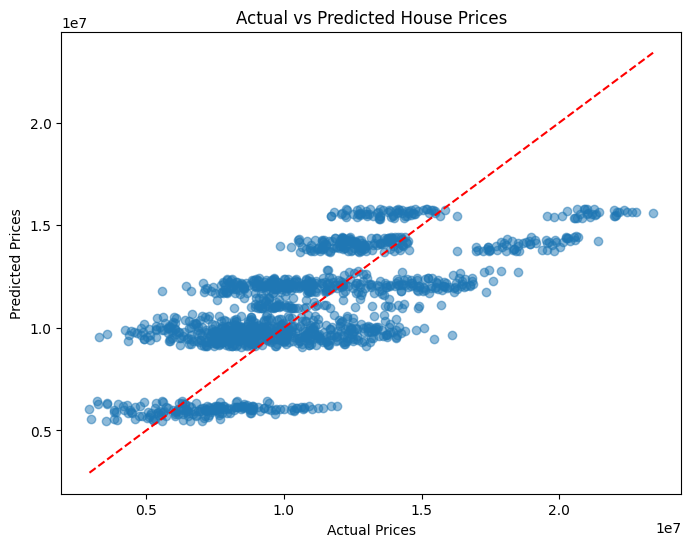

In [35]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha for transparency
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()
